<a href="https://colab.research.google.com/github/yaswanthkumarch/SIMPLE-LINEAR-REGRESSION-DATA/blob/main/SIMPLE_LINEAR_REGRESSION1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WORKING WITH SIMPLE LINEAR REGRESSION DATA 

In [ ]:
%load_ext rpy2.ipython


In [ ]:
%%R
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
%%R
salary=read_csv("/content/Salary_Data.csv")
print(salary)

Rows: 30 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): YearsExperience, Salary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 30 × 2
   YearsExperience Salary
             <dbl>  <dbl>
 1             1.1  39343
 2             1.3  46205
 3             1.5  37731
 4             2    43525
 5             2.2  39891
 6             2.9  56642
 7             3    60150
 8             3.2  54445
 9             3.2  64445
10             3.7  57189
# … with 20 more rows


In [ ]:
%%R
print(salary)


# A tibble: 30 × 2
   YearsExperience Salary
             <dbl>  <dbl>
 1             1.1  39343
 2             1.3  46205
 3             1.5  37731
 4             2    43525
 5             2.2  39891
 6             2.9  56642
 7             3    60150
 8             3.2  54445
 9             3.2  64445
10             3.7  57189
# … with 20 more rows


In [ ]:
%%R
print(salary$YearsExperience)
print(salary$Salary)

 [1]  1.1  1.3  1.5  2.0  2.2  2.9  3.0  3.2  3.2  3.7  3.9  4.0  4.0  4.1  4.5
[16]  4.9  5.1  5.3  5.9  6.0  6.8  7.1  7.9  8.2  8.7  9.0  9.5  9.6 10.3 10.5
 [1]  39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
[11]  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
[21]  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%R
cor(salary$Salary,salary$YearsExperience)


[1] 0.9782416


In [ ]:
%%R
relation<-lm(salary$Salary~salary$YearsExperience)
print(relation)


Call:
lm(formula = salary$Salary ~ salary$YearsExperience)

Coefficients:
           (Intercept)  salary$YearsExperience  
                 25792                    9450  



In [ ]:
%%R
names(relation)


 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        


In [ ]:
%%R
str(relation)
relation$coefficients
c=relation$coefficients[2]
print(c)

List of 12
 $ coefficients : Named num [1:2] 25792 9450
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "salary$YearsExperience"
 $ residuals    : Named num [1:30] 3156 8128 -2236 -1167 -6691 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ effects      : Named num [1:30] -416286 144419 -4019 -2746 -8188 ...
  ..- attr(*, "names")= chr [1:30] "(Intercept)" "salary$YearsExperience" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:30] 36187 38077 39967 44692 46582 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:30, 1:2] -5.477 0.183 0.183 0.183 0.183 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:30] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "salary$YearsExperience"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.22
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr

In [ ]:
%%R
c=relation$coefficients[1]
m=relation$coefficients[2]
print(c)
print(m)

(Intercept) 
    25792.2 
salary$YearsExperience 
              9449.962 


In [ ]:
%%R
y=m*10+c
print(y)

salary$YearsExperience 
              120291.8 


In [ ]:
%%R
y=m*salary$YearsExperience+c
print(y)
salary1<-mutate(salary,predicted=y)
salary2<-mutate(salary1,difference=salary-predicted)
print(salary1)
print(salary2)

 [1]  36187.16  38077.15  39967.14  44692.12  46582.12  53197.09  54142.09
 [8]  56032.08  56032.08  60757.06  62647.05  63592.05  63592.05  64537.05
[15]  68317.03  72097.02  73987.01  75877.00  81546.98  82491.97  90051.94
[22]  92886.93 100446.90 103281.89 108006.87 110841.86 115566.84 116511.84
[29] 123126.81 125016.80
# A tibble: 30 × 3
   YearsExperience Salary predicted
             <dbl>  <dbl>     <dbl>
 1             1.1  39343    36187.
 2             1.3  46205    38077.
 3             1.5  37731    39967.
 4             2    43525    44692.
 5             2.2  39891    46582.
 6             2.9  56642    53197.
 7             3    60150    54142.
 8             3.2  54445    56032.
 9             3.2  64445    56032.
10             3.7  57189    60757.
# … with 20 more rows
# A tibble: 30 × 4
   YearsExperience Salary predicted difference$YearsExperience $Salary
             <dbl>  <dbl>     <dbl>                      <dbl>   <dbl>
 1             1.1  39343    36187.      

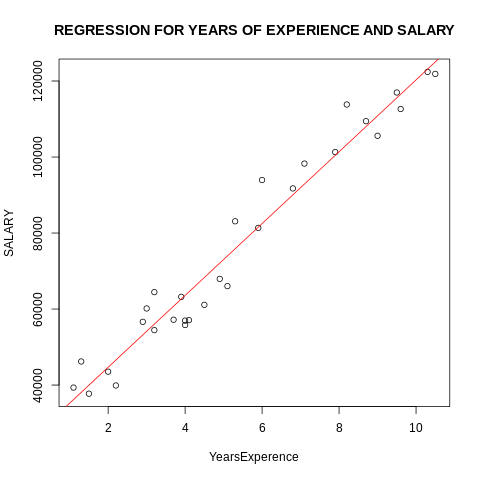

In [ ]:
%%R
plot(salary$YearsExperience,salary$Salary,
     main="REGRESSION FOR YEARS OF EXPERIENCE AND SALARY",
     xlab="YearsExperence",ylab="SALARY")
abline(relation,col="red")